# <center> ![KPI_logo](photos\KPI_logo.png)

## <center> Міністерство освіти і науки, молоді та спорту України Національний технічний університет України "Київський політехнічний інститут імені Ігоря Сікорського" Фізико - технічний інститут

## <center>__Курсова робота__
### <center>__Аналіз даних за допомогою Python та бібліотеки Pandas__

<center>Виконав: Климентьєв Максим Андрійович  
<center>Студент групи ФІ-21, НН ФТІ  
<center>Перевірив  

***
## Частина 1 Знайомство з можливостями Anaconda/IPython  Notebook 
***
### Мета Частини 1: 
- [x] Вивчення основних принципів роботи та використання програмних  компонентів Anaconda. 
- [x] Інсталяція. 
- [x] Дослідження можливостей IPython  Notebook. 
- [x] Підготовка розділу 1 пояснювальної записки про зроблену роботу — опис інсталяції, можливостей використання та їх ілюстрація. 
***

### Основні принципи роботи та використання програмних компонентів Anaconda

> _**Anaconda** — це вільно та відкрито розповсюджуваний **дистрибутив різних програмних продуктів**, зокрема, мов програмування Python та R. **Платформа спеціалізується на «наукових обчисленнях».**_ 
>
>![](Photos\Anaconda_logo.png)

> *Версіями пакунків керує система управління пакетами __Conda__.*
> <div> <img src="Photos\conda_logo.webp" width="450"/> </div>

> *__Дистрибутив Anaconda використовується понад 25 мільйонами користувачів__ і містить більше 1500 популярних пакетів наукових даних, придатних для Windows, Linux та MacOS, наприклад, NumPy, SciPy та Ggplot2.*
> <div> <img src="Photos\Anaconda_2021_review.png" width="450"/> </div>

> #### *Швидкий старт з інструментами з відкритим вихідним кодом:*
*Легко запускайте проекти зі штучного інтелекту та науки про дані на локальній машині за допомогою Anaconda Navigator. Скористайтеся перевагами широкого розповсюдження пакетів з відкритим вихідним кодом Anaconda та легкого керування середовищем.*
> ![](Photos\Anaconda_navigator.png)

>**Spyder** — це безкоштовне наукове середовище з відкритим кодом, написане мовою Python для Python і розроблене вченими, інженерами та аналітиками даних для таких же, як вони. Він характеризується унікальним поєднанням розширених функцій редагування, аналізу, налагодження та профілювання комплексного інструменту розробки з дослідженням даних, інтерактивним виконанням, глибокою перевіркою та чудовими можливостями візуалізації наукового пакету.

> <div> <img src="Photos\editor-spyder.svg" width="100"/> </div>

>**Редагувач**  
Ефективно працюйте в багатомовному редакторі з браузером функцій/класів, інструментами аналізу коду, автоматичним доповненням коду, горизонтальним і вертикальним поділом і переходом до визначення.

> <div> <img src="Photos\console-spyder.svg" width="100"/> </div>

>**IPython консоль**  
Використовуйте потужність будь-якої кількості консолей IPython в одному графічному інтерфейсі. Запуск коду по рядку, комірці або файлу; або працювати в інтерактивному режимі з налагодженням, сюжетами та магічними командами.

> <div> <img src="Photos\varExplorer-spyder.svg" width="100"/> </div>

>**Провідник змінних**  
Взаємодійте зі змінними та змінюйте їх на льоту: створюйте гістограму або часовий ряд, редагуйте дату або масив Numpy, сортуйте колекцію, досліджуйте вкладені об’єкти тощо!

> <div> <img src="Photos\plots-spyder.svg" width="100"/> </div>

>**Графіки**  
Переглядайте, масштабуйте, копіюйте та зберігайте фігури та зображення, які ви створюєте.

> <div> <img src="Photos\debugger-spyder.svg" width="100"/> </div>

>**Режим відкладки**  
Відстежуйте кожен крок виконання коду в інтерактивному режимі.
***

>**The Jupyter Notebook** — це оригінальна веб-програма для створення та обміну обчислювальними документами. Вона пропонує простий, оптимізований, орієнтований на документ досвід.

>![](Photos\language-jupyter.svg)  
>**Мова на вибір**  
Jupyter підтримує понад 40 мов програмування, включаючи Python, R, Julia та Scala.

>![](Photos\share-jupyter.svg)  
>**Поділіться блокнотами**  
Блокнотами можна ділитися з іншими за допомогою електронної пошти, Dropbox, GitHub і Jupyter Notebook Viewer.

>![](Photos\widget-jupyter.svg)  
>**Інтерактивний вихід**  
Ваш код може створювати насичений інтерактивний вихід: HTML, зображення, відео, LaTeX і спеціальні типи MIME.

>![](Photos\spark-jupyter.svg)  
>**Інтеграція великих даних**  
Використовуйте інструменти великих даних, такі як Apache Spark, від Python, R і Scala. Досліджуйте ті самі дані за допомогою pandas, scikit-learn, ggplot2 і TensorFlow.

 ### Інсталяція
 > Заходимо на [Anaconda](https://www.anaconda.com/), натискаємо _Free Download_.
 >![](Photos\Anaconda_1.png)

> Натискаємо _Download_, чекаємо поки завантажиться.
> ![](Photos\Anaconda_2.png)

> Відкриваємо файл, натискаємо _Next_.  
> ![Anaconda_3](Photos\Anaconda_3.png)

> Погоджуємося з умовами.  
> ![Anaconda_4](Photos\Anaconda_4.png)

> Обираємо для кого встановлюємо.  
> ![Anaconda_5](Photos\Anaconda_5.png)

> Обираємо куди встановлюємо.  
> ![Anaconda_6](Photos\Anaconda_6.png)

> Обираємо додаткові параметри, які нам треба. Натискаємо _Install_  
> ![Anaconda_7](Photos\Anaconda_7.png)

### Дослідження можливостей IPython  Notebook.  
> #### Довідкова інформація 
*Робота з Ipython Notebook  
Ipython Notebook — це середовище розробки, що дає можливості для інтерактивної та ітеративної  розробки проектів, пов’язаних з Data Science. Notebook інтегрує код та результати його виконання в  один файл разом з графіками, текстом, математичними виразами та іншими можливими видами  представлення інформації. IPython Notebook встановлюється разом з Spyder для Python3 у  дистрибутиві Anaconda.*

>IPython Notebook тепер відомий як Jupyter Notebook та вже описаний вище, у основних принципах роботи та використання програмних компонентів Anaconda. Це інтерактивне обчислювальне середовище, в якому можна поєднувати виконання коду, форматований текст, математику, сюжети та мультимедіа.

>IPython Notebook - це інтерактивне середовище для виконання коду Python, створене для зручності вивчення, розробки і аналізу даних. Це потужний інструмент, який дозволяє поєднувати код, текст, графіки і інші елементи в єдиному документі. Ось деякі з можливостей IPython Notebook:
> - __Інтерактивність__: Ви можете виконувати код почергово, дозволяючи вам перевіряти і тестувати кожен етап вашого аналізу або розробки.
> - __Магічні команди__: IPython має спеціальні команди, які дозволяють вам виконувати різні завдання. Наприклад, %run дозволяє виконати зовнішній Python-скрипт, а %timeit дозволяє вам виміряти час виконання коду та багато інших.
> - __Вбудовані графіки__: Ви можете легко створювати графіки, використовуючи бібліотеки, такі як Matplotlib чи Seaborn, і відразу бачити їх у своєму документі.
> - __Робота з різними мовами програмування__: IPython може працювати з різними мовами програмування, не тільки з Python. Це дозволяє вам використовувати один документ для об'єднання коду різних мов.
> - __Підтримка Markdown__: Ви можете використовувати Markdown для форматування тексту, вставляти зображення та пояснення в своєму документі.
> - __Зручна робота з даними__: Pandas, бібліотека для роботи з даними в Python, ідеально підходить для використання в IPython Notebook. Ви можете легко завантажувати, обробляти і відображати дані в зручній формі.
> - __Експорт в різні формати__: Ви можете експортувати свій notebook в різні формати, такі як HTML, PDF, або навіть презентацію.  

>IPython Notebook дозволяє створювати і документувати вашу роботу в інтерактивній формі, що робить його потужним інструментом для вивчення, навчання та розробки.

***
## Частина 2. Виконання та підготовка розділу 2 пояснювальної записки. 
***
### Мета Частини 2:
- [x] Отримати досвід використання основних засобів аналізу та візуалізації даних у середовищі IPython  Notebook на модельних наборах даних. 
- [x] Довідкова інформація
- [x] Візуалізація в Python — це важливий аспект роботи з даними. Python надає великі можливості для  візуального представлення даних, починаючи з відображення таблиць з виділенням окремих  елементів за допомогою pandas, закінчуючи побудовою графіків за допомогою matplotlib, seaborn,  mplot3d. Гайд для побудови візуалізації даних доступний через towards [data science](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e).
***  
### Дані  
1. В роботі використовується публічний набір даних з [kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales) 
***

### Завдання

#### 1. Встановити IPython Notebook разом з Anaconda та створити новий IPython Notebook 3/2  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib
%matplotlib inline

# from pprint import pprint

from numba import njit

#### 3. Відкрити набір даних засобами pandas. 

In [2]:
df = pd.read_csv('vgsales.csv', index_col="Rank")
df.head()

df_for_corellation = df.copy()

#### 2. Проаналізувати набір даних на наявність пропущених значень та NaN. 
У випадку наявності таких значень їх потрібно заповнити значеннями за допомогою fillna,  використовуючи метод bfill (заміна на наступне валідне значення після Nan) або ffil (заміна  на попереднє валідне значення після Nan) 

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
if df.isnull().values.any():
    df = df.bfill()# .fillna(method='bfill')

#### Data Changing 

In [6]:
df = df.astype({'Year': int,
         'NA_Sales': float,
         'EU_Sales': float,
         'JP_Sales': float,
         'Other_Sales': float,
         'Global_Sales': float})

In [7]:
df_for_corellation = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  int32  
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


#### 4. Представити його у матричному вигляді. 
##### Відобразити 10 елементів для 4-ох ознак. 
Виділити  зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів.

In [9]:
df_10 = df.head(10)

In [10]:
s = df_10.style.hide(['Name', "Platform", 'Year', 'Genre', 'Publisher', 'Global_Sales'], axis="columns")#.hide(axis="rows")
s.set_table_styles([
    {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]},
    {'selector': '.index_name', 'props': 'font-style: italic; color: white; font-weight:normal;'},
    {'selector': 'th:not(.col_heading)', 'props': 'background-color: #00000; color: #000066;'}, 
    {'selector': 'th:not(.col_heading)', 'props': 'background-color: #000066;'}, 
    {'selector': 'th.col_heading', 'props': 'background-color: #000066; color: white;'}, 
    {'selector': 'th.row_heading', 'props': 'background-color: #000066; color: white;'}, 
]) #:not(.index_name)
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
    {'selector': '.true', 'props': 'background-color: #e6ffe6;'},
    {'selector': '.false', 'props': 'background-color: #ffe6e6;'},
], overwrite=False)
s.highlight_max(color='green').highlight_min(color='red')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,
1,41.490000,29.020000,3.770000,8.460000
2,29.080000,3.580000,6.810000,0.770000
3,15.850000,12.880000,3.790000,3.310000
4,15.750000,11.010000,3.280000,2.960000
5,11.270000,8.890000,10.220000,1.000000
6,23.200000,2.260000,4.220000,0.580000
7,11.380000,9.230000,6.500000,2.900000
8,14.030000,9.200000,2.930000,2.850000
9,14.590000,7.060000,4.700000,2.260000


In [11]:
dispersion = df.var(numeric_only=True)
dispersion

Year            34.123282
NA_Sales         0.666971
EU_Sales         0.255380
JP_Sales         0.095661
Other_Sales      0.035566
Global_Sales     2.418112
dtype: float64

##### Вирахувати математичне сподівання та дисперсію для набору даних. Стандартизувати дані.  

$ X_{std} = \sqrt{\dfrac{\sum_{i=1}^{n}{\lvert(X_i-\bar{X})\rvert^2}}{n}} $

$ \mu = \sum_{i=1}^{n}{p_i X_i}$

In [12]:

def myu(array_1d):
    
    myu = 0
    dict_for_elem_with_count = {}
    
    for array_elem in array_1d:
        if array_elem not in dict_for_elem_with_count:
            dict_for_elem_with_count[array_elem] = 1
        else:
            dict_for_elem_with_count[array_elem] += 1
    for array_elem, count in dict_for_elem_with_count.items():
        myu += count * array_elem
    return myu

def mean_df(df):
    df_to_return = df.copy()
    
    for name in df_num.columns:
        
        sum_mean = 0
        quantity = df[name].values.size
        
        for array_elem in df[name].values:
            sum_mean += array_elem
            df_to_return[name] = sum_mean/quantity
            
    return df_to_return

@njit(nogil=True)
def mean(array_1d):
    
    sum_mean = 0
    quantity = array_1d.size
    
    for array_elem in array_1d:
        sum_mean += array_elem
    return sum_mean/quantity

@njit(nogil=True)
def sigma(array_1d):
    array_mean = mean(array_1d)
    # print(array_mean, np.mean(array_1d))
    
    quantity = array_1d.size
    sum_elem = 0

    for array_elem in array_1d:
        
        sum_elem += abs(array_elem-array_mean)**2
        # print(np.sqrt(sum_elem/(quantity)))
    return np.sqrt(sum_elem/(quantity))

def std(df):
    df_to_return = df.copy()
    
    for name in df_num.columns:
        mu = myu(df[name].values)
        print(f'Myu for {name} is {mu}')
        sgma = sigma(df[name].values)
        df_to_return[name] = sgma
    return df_to_return

In [13]:
df_num = df.select_dtypes(include=np.number)
df_num = df_num.drop('Year', axis=1)
df_num = df_num.drop('Global_Sales', axis=1)
# df_num.values

In [14]:
# print(f'My mean is {mean_df(df_num)} and Np mean is {df_num.mean()}')
# print(f'My std is {std(df_num)} and Np std is {df_num.std()}')
standatrized_df = (df_num - mean_df(df_num)) / std(df_num)

print(standatrized_df.mean().apply(lambda x: "{:.6f}".format(x)))
print(standatrized_df.std())#.apply(lambda x: "{:.6f}".format(x)))
print(standatrized_df.var())#.apply(lambda x: "{:.6f}".format(x)))

standatrized_df

Myu for NA_Sales is 4392.950000000001
Myu for EU_Sales is 2434.1300000000006
Myu for JP_Sales is 1291.020000000001
Myu for Other_Sales is 797.7499999999995
NA_Sales       -0.000000
EU_Sales       -0.000000
JP_Sales        0.000000
Other_Sales     0.000000
dtype: object
NA_Sales       1.00003
EU_Sales       1.00003
JP_Sales       1.00003
Other_Sales    1.00003
dtype: float64
NA_Sales       1.00006
EU_Sales       1.00006
JP_Sales       1.00006
Other_Sales    1.00006
dtype: float64


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,
1,50.480508,57.136930,11.938058,44.606085
2,35.284437,6.794188,21.767296,3.828224
3,19.084273,25.197785,12.002724,17.297115
4,18.961823,21.497277,10.353740,15.441165
5,13.476053,17.302048,32.792857,5.047848
...,...,...,...,...
16596,-0.311841,-0.290207,-0.251492,-0.254864
16597,-0.311841,-0.290207,-0.251492,-0.254864
16598,-0.324086,-0.290207,-0.251492,-0.254864


#### 5. Провести візуалізацію даних. 
Для цього необхідно побудувати такі типи графіків: Line Plot,  Bare Chart, Histogram, Heatmap. 

In [15]:
standatrized_df_100 = standatrized_df.head(100)
standatrized_df_50 = standatrized_df.head(50)

"Lineplot" або "line chart" - це графічний метод візуалізації даних, який використовує лінії для з'єднання точок даних на графіку. Цей тип графіка особливо корисний для відображення змін величини часу, а також для показу трендів і зв'язків між змінними.

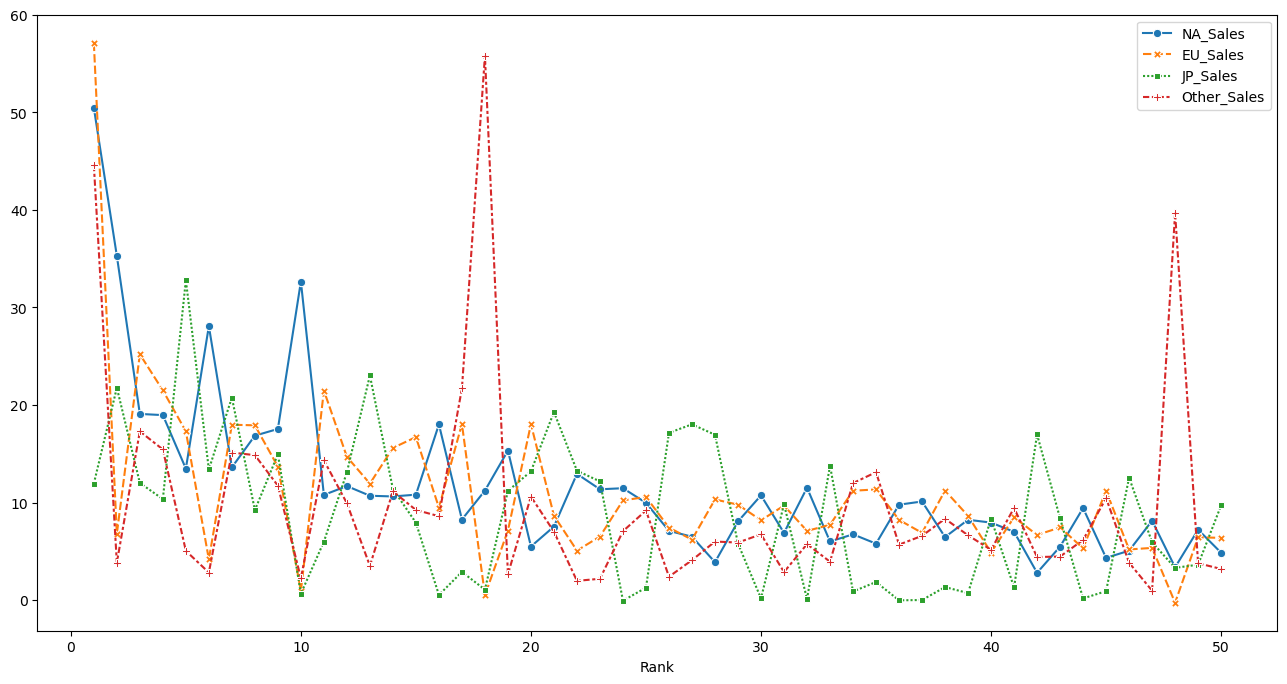

In [16]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=standatrized_df_50, markers=True)

Можна побачити, що в Інших продажах були скачки продажів
***

"Barplot" - це графічний метод візуалізації даних, який використовується для відображення кількісних значень за допомогою прямокутників (стовпців), довжина яких пропорційна значенням, які вони представляють. Цей тип графіка особливо ефективний для порівняння значень між різними категоріями.

<Axes: >

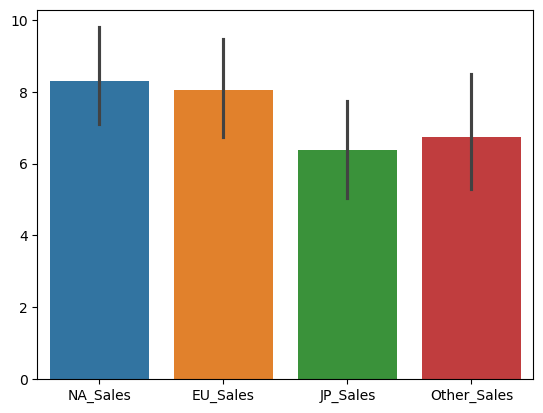

In [17]:
sns.barplot(standatrized_df_100)

Можно побачити, що Японці купували менше всього, а Американці купували найбільше.
***

Гістограма (Histogram) - це наближене представлення розподілу числових даних. Вперше цей термін ввів Карл Пірсон. Щоб побудувати гістограму, першим кроком є "розбиття" діапазону значень - тобто розбиття всього діапазону значень на ряд інтервалів - а потім підрахунок кількості значень, що потрапляють в кожен інтервал.

Діапазони (інтервали) повинні бути суміжними і часто (але не обов'язково) однакового розміру.

Якщо інтервали мають однаковий розмір, над ними проводиться смуга висотою, пропорційною частоті - кількості випадків у кожному інтервалі. Гістограма також може бути нормалізована для відображення "відносних" частот, що показують частку випадків, які потрапляють у кожну з декількох категорій, при цьому сума висот дорівнює 1.

<Axes: ylabel='Count'>

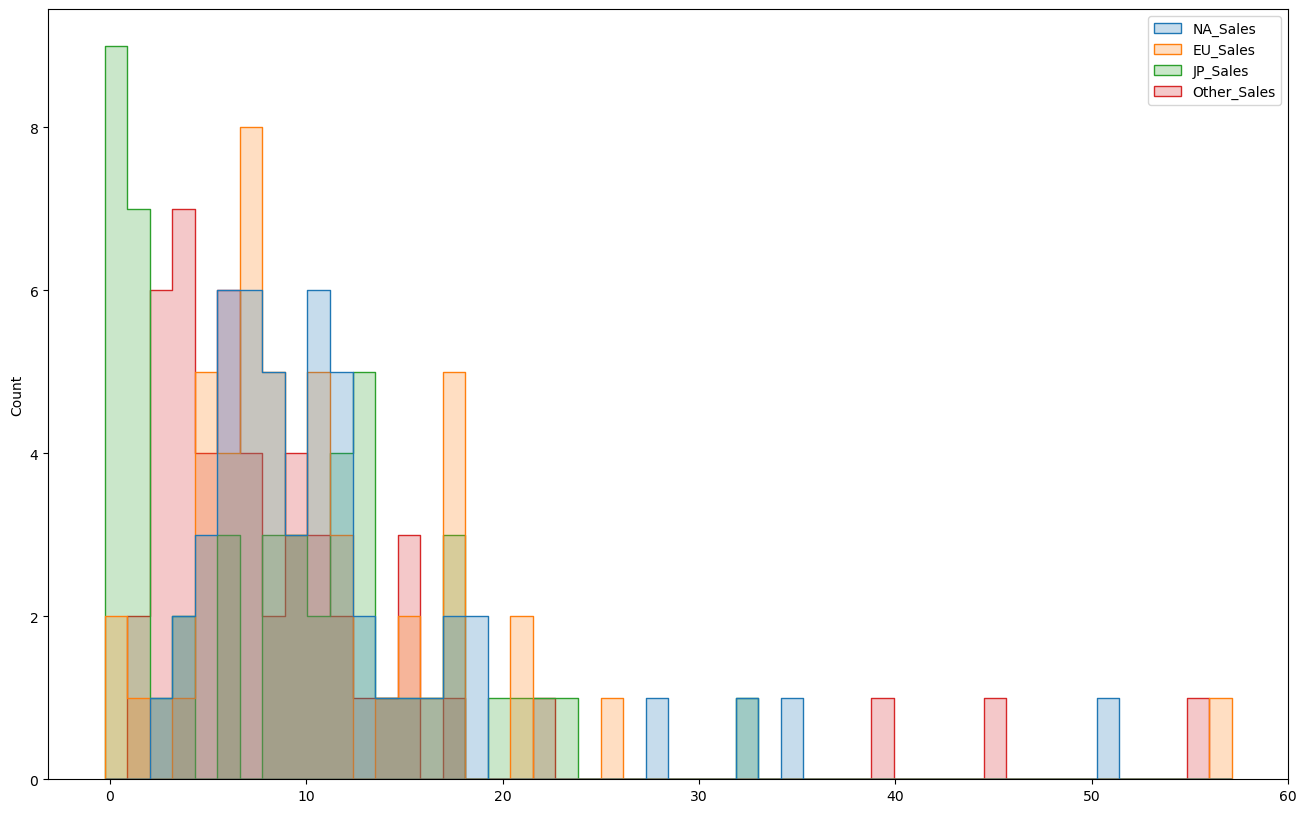

In [34]:
plt.figure(figsize=(16, 10))
sns.histplot(standatrized_df_50, multiple='layer', element='step', bins=50) #{“layer”, “dodge”, “stack”, “fill”} {“bars”, “step”, “poly”}

Можно побачити, що Японці купували менше всього, Европейці та Інші в середині, а Американці купували найбільше.
***

Теплока́рта (англ. heatmap) — являє собою графічне представлення даних, при якому окремі значення що містяться в матриці представлено у вигляді кольорів. Фрактальні карти та деревоподібні карти часто використовують подібні системи кодування кольорів для представлення значень, яких набуває змінна в ієрархії. Термін «Теплокарта» був запропонований розробником програмного забезпечення Кормаком Кінні в 1991 році з метою описати двовимірний дисплей, котрий відображав інформацію з фінансових ринків у реальному часі.

<Axes: ylabel='Rank'>

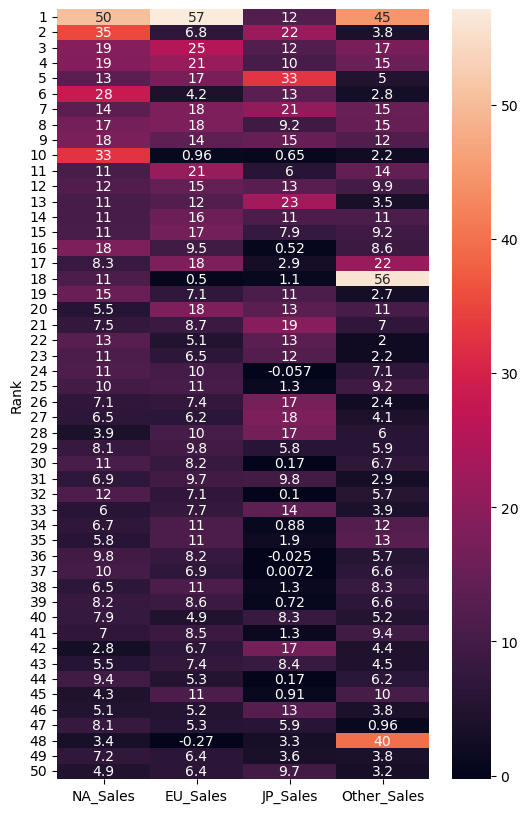

In [19]:
plt.figure(figsize=(6, 10))
ax = sns.heatmap(standatrized_df_50, annot=True)
ax#.invert_yaxis()

Тут ми можемо побачити, що в Японії менше всього купували, а в Америці більше всього.
***

#### 6. Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього  значення кожної лінії. 
При цьому для візуалізації багатовимірних даних з кількістю ознак  більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за  допомогою комбінування різних ознак. [Туторіал по subplot та приклади](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)  



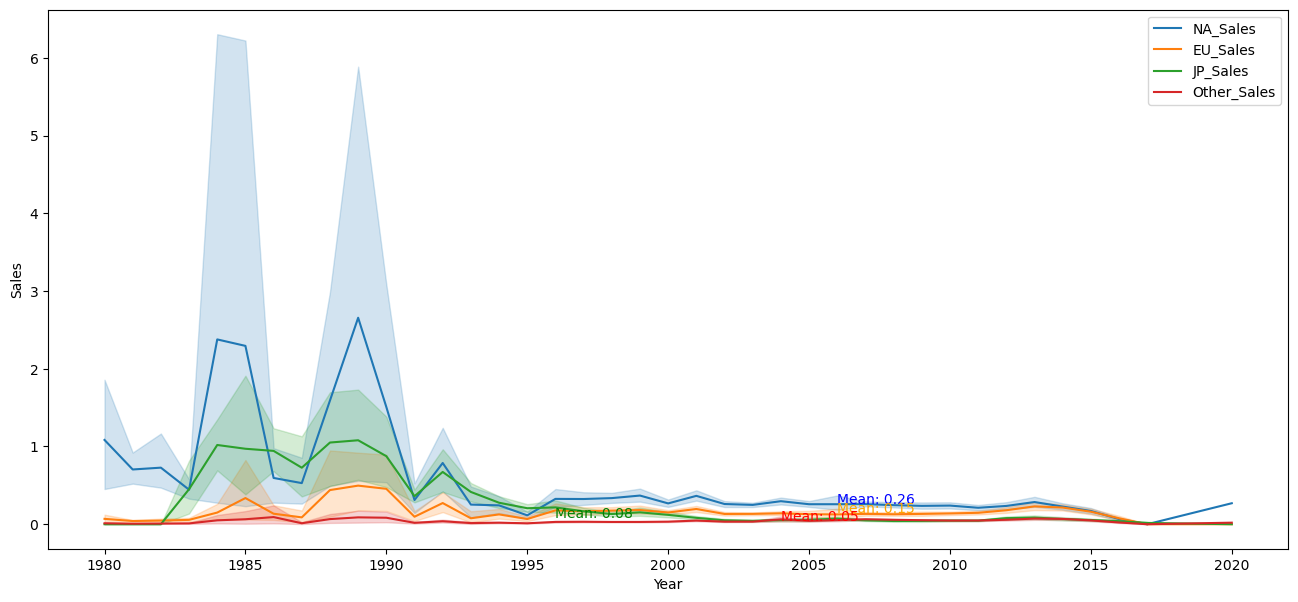

In [20]:
plt.figure(figsize=(16, 7))
# Створюємо графік з чотирма лініями

x = df['Year']#.values
y1 = df['NA_Sales']#.values
y2 = df['EU_Sales']#.values
y3 = df['JP_Sales']#.values
y4 = df['Other_Sales']#.values
colors = ['blue', 'orange', 'green', 'red']

sns.lineplot(x=x, y=y1, label='NA_Sales')
sns.lineplot(x=x, y=y2, label='EU_Sales')
sns.lineplot(x=x, y=y3, label='JP_Sales')
sns.lineplot(x=x, y=y4, label='Other_Sales')

# Додаємо анотації для середнього значення кожної лінії
for i, line in enumerate([y1, y2, y3, y4]):
    mean_value = np.mean(line)
    max_sales = df[line.name].max()
    # print(max_sales)
    # print(df[df[line.name] == max_sales]['Year'].values, mean_value)
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(df[df[line.name] == max_sales]['Year'].values, mean_value),color=colors[i])#, textcoords='offset points', xytext=(5, 0), ha='left')

# Додаємо легенду та підписи до осей
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')

# Відображаємо графік
plt.show()

Можна побачити, що кількість купівель раніше в Америці дуже колебалося.
***

C:\Users\dadmo\.conda\envs\Lab2\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


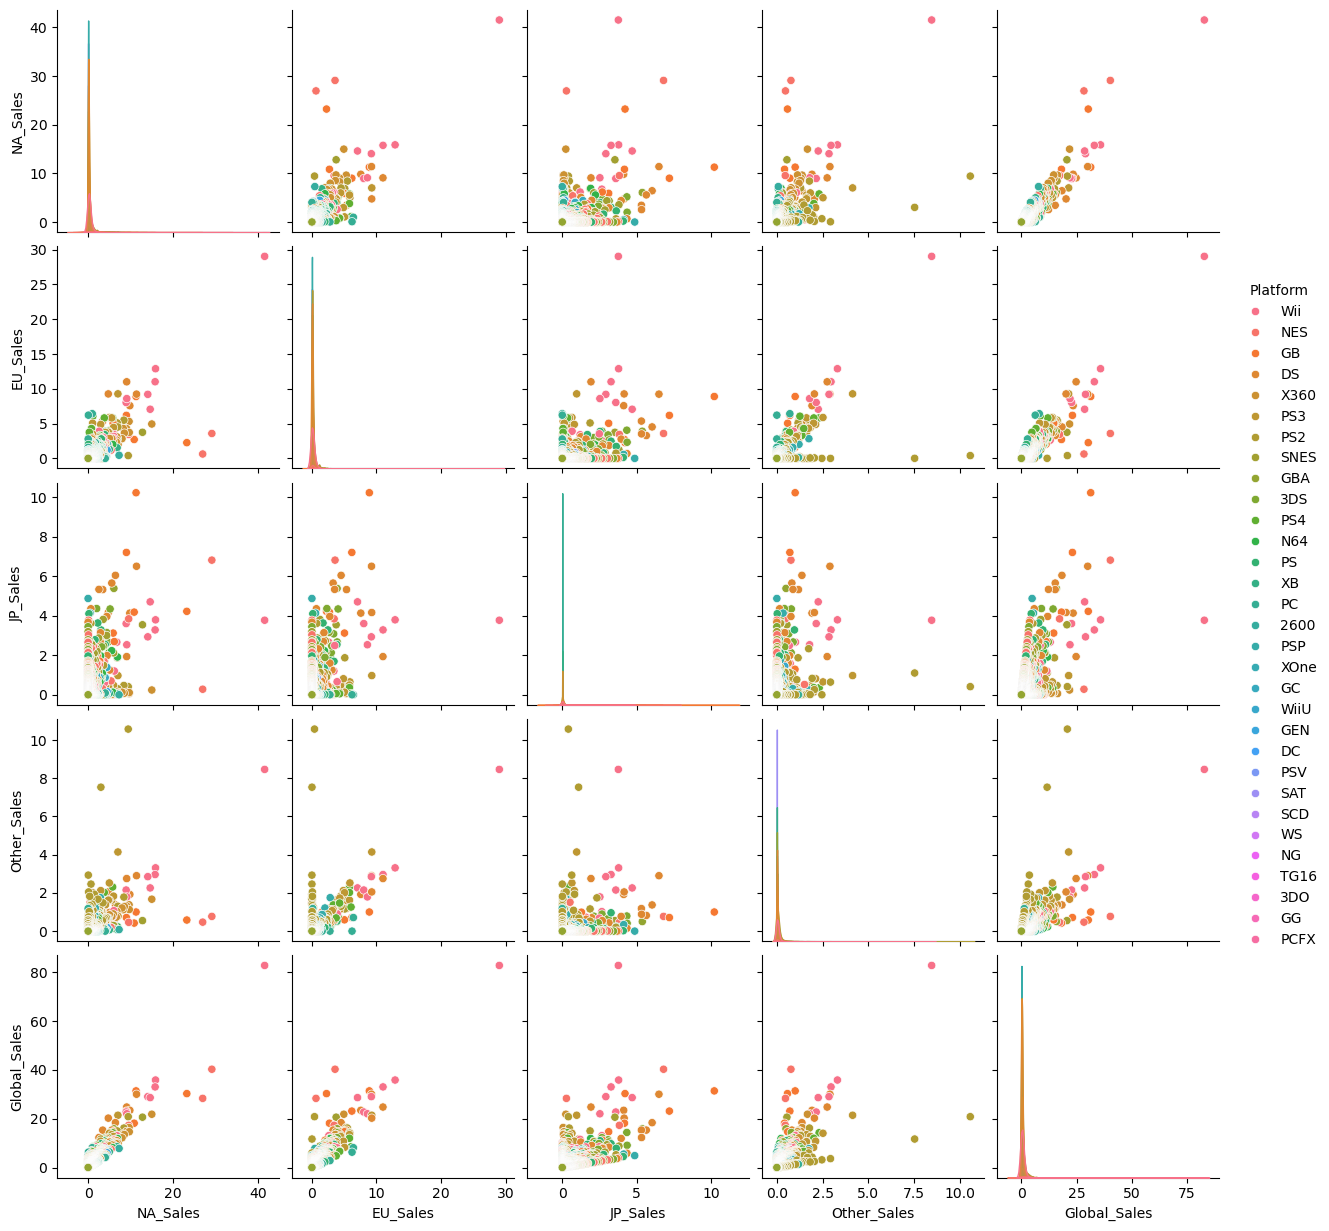

In [21]:
sns.pairplot(df.drop(['Year'],axis=1), hue='Platform')

Можна побачити, що ігри на WII мали найбільше купівель.
***

#### 7. Вирахувати коефіцієнт пірсона для кожної пари ознак. 
Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу  кореляцію за допомогою бібліотеки seaborn. 

In [22]:
df_for_corellation.corr(method="pearson", numeric_only=True)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.090542,0.006383,-0.167479,0.040792,-0.073852
NA_Sales,-0.090542,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006383,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.167479,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.040792,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.073852,0.941047,0.902836,0.611816,0.748331,1.000000


Бачимо, що Global_Sales та NA_Sales мають найбільшу кореляцію. Тож беремо перші 50 з рейтингу та кладемо в sns.relplot(), підсвічуючи яка саме це платформа.

C:\Users\dadmo\.conda\envs\Lab2\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


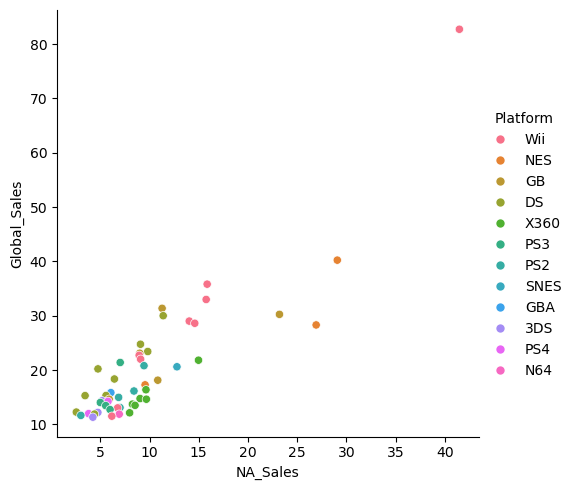

In [23]:
sns.relplot(df_for_corellation.head(50), x='NA_Sales', y='Global_Sales', hue='Platform')

#### 8. У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою  fillna, необхідно видалити всі колонки із значеннями Nan. 

Згадуємо, що на початку зробили копію основного датасету, викидуємо значення Nan, надаємо правильні типи данних та перевіряємо чи видалили усі Nan.

In [24]:
df_for_corellation = df_for_corellation.dropna()
df_for_corellation = df_for_corellation.astype({'Year': int,
     'NA_Sales': float,
     'EU_Sales': float,
     'JP_Sales': float,
     'Other_Sales': float,
     'Global_Sales': float})
df_for_corellation.isnull().sum()
df_for_correllation = df_for_corellation.copy()

#### 9. Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10%  для обох. 
Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid  для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.

Кореляція після видалення випадкових значень:
                  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year          1.000000 -0.090542  0.006383 -0.167479     0.040792   
NA_Sales     -0.090542  1.000000  0.767727  0.449787     0.634737   
EU_Sales      0.006383  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.167479  0.449787  0.435584  1.000000     0.290186   
Other_Sales   0.040792  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.062663  0.945337  0.913109  0.612873     0.754773   

              Global_Sales  
Year             -0.062663  
NA_Sales          0.945337  
EU_Sales          0.913109  
JP_Sales          0.612873  
Other_Sales       0.754773  
Global_Sales      1.000000  
Бачимо не дуже високі зміни


C:\Users\dadmo\.conda\envs\Lab2\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


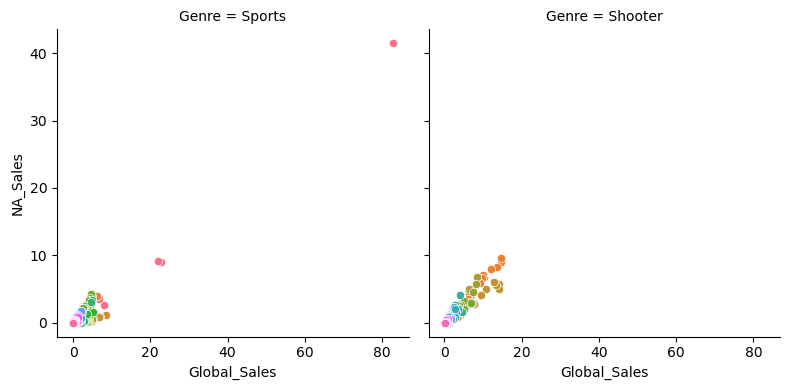

In [25]:
# plt.figure(figsize=(16, 8))
# Обчислюємо кореляції між ознаками
correlation_matrix = df_for_corellation.corr(method="pearson", numeric_only=True)

# Знаходимо пари ознак з найвищою кореляцією
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Видаляємо 10% випадкових значень для вибраних ознак
for feature in correlated_features:
    mask = np.random.rand(len(df_for_corellation)) < 0.9
    # print(mask)
    df_for_corellation.loc[~mask, feature] = np.nan
    # print(df_for_corellation[df_for_corellation==np.nan])

# Виводимо кореляцію після видалення випадкових значень
print("Кореляція після видалення випадкових значень:")
print(df_for_corellation.corr(method="pearson", numeric_only=True))
print("Бачимо не дуже високі зміни")

# Побудова multiple scatterplot за допомогою FacetGrid
g = sns.FacetGrid(df_for_corellation[(df_for_corellation['Genre'] == "Shooter") | (df_for_corellation['Genre'] == "Sports")], col='Genre', hue='Platform', height=4, legend_out=True)
g.map(sns.scatterplot, 'Global_Sales', 'NA_Sales')
plt.show()

***
## Частина 3. Виконання та протоколювання додаткових завдань.

### Додаткові завдання 

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data = df_for_correllation[['NA_Sales', 'Global_Sales']]

train_set, test_set = train_test_split(data, test_size=0.5)#, random_state=4000000000)

x_train, y_train = train_set['NA_Sales'], train_set['Global_Sales']
x_test, y_test = test_set['NA_Sales'], test_set['Global_Sales']

x_train, y_train = np.atleast_2d(x_train), np.atleast_2d(y_train)
# x_test, y_test = np.atleast_2d(np.delete(x_test, 3974 , axis=0)), np.atleast_2d(np.delete(y_test, 3974 , axis=0))
x_test, y_test = np.atleast_2d(x_test), np.atleast_2d(y_test)

1. Збудувати регресійні моделі прогнозування однієї ознаки на основі іншої. Для цього візьміть  дві ознаки, що мають найбільшу кореляцію.

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [28]:
rgr_reg = RandomForestRegressor()
rgr_reg.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
mlpp_reg = MLPRegressor()
mlpp_reg.fit(x_train, y_train)

MLPRegressor()

2. Вирахувати точність прогнозування та вибрати модель з найкращим результатом

In [30]:
# Оцінка моделей за середньою квадратичною помилкою
mse_linear = mean_squared_error(x_test, linear_reg.predict(x_test))
mse_rgr = mean_squared_error(x_test, rgr_reg.predict(x_test))
mse_mlpp = mean_squared_error(x_test, mlpp_reg.predict(x_test))

print(f'MSE Лінійна регресія: {mse_linear}')
print(f'MSE Регресія випадкового лісу: {mse_rgr}')
print(f'MSE Регресія багатошарового персептрону: {mse_mlpp}')

MSE Лінійна регресія: 2.745890854319798
MSE Регресія випадкового лісу: 2.745890854319798
MSE Регресія багатошарового персептрону: 2.0043937505376874


4. Візуалізувати результуючу регресійну функцію та результат прогнозування за допомогою  matplotlib та seaborn.  [Візуалізація регресійних функцій](https://seaborn.pydata.org/tutorial/regression.html)  

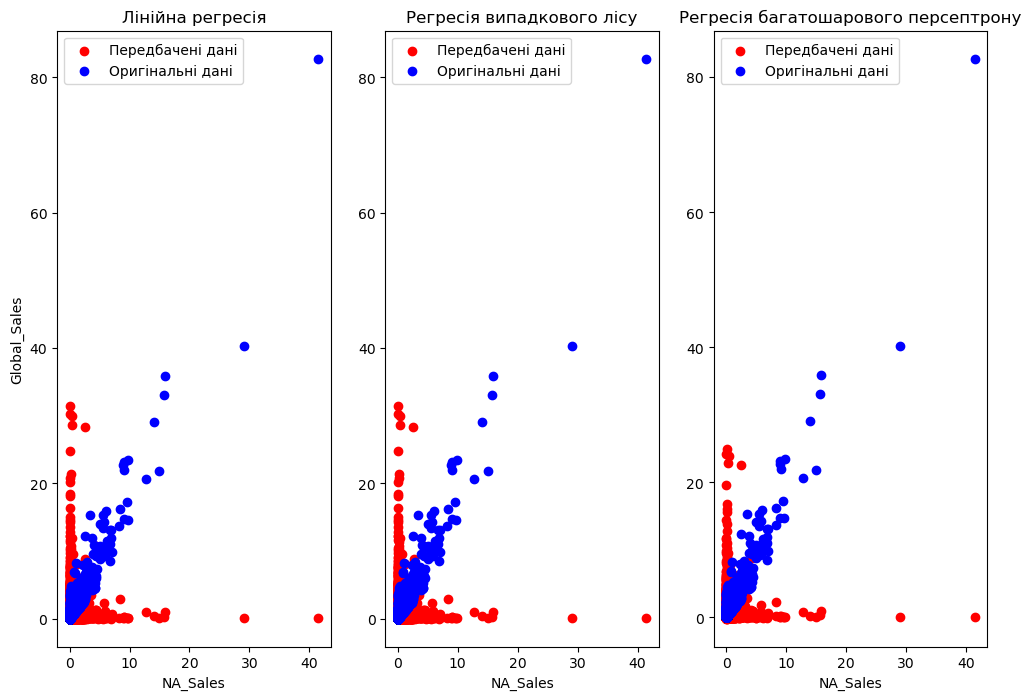

In [31]:
# Візуалізація результатів
plt.figure(figsize=(12, 8))

# Лінійна регресія
plt.subplot(1, 3, 1)
plt.scatter(x_test, linear_reg.predict(x_test), color='red')
plt.scatter(x_test, y_test, color='blue')
plt.title('Лінійна регресія')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

# Регресія випадкового лісу
plt.subplot(1, 3, 2)
plt.scatter(x_test, rgr_reg.predict(x_test), color='red')
plt.scatter(x_test, y_test, color='blue')
plt.title('Регресія випадкового лісу')
plt.xlabel('NA_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

# Регресія багатошарового персептрону
plt.subplot(1, 3, 3)
plt.scatter(x_test, mlpp_reg.predict(x_test), color='red')
plt.scatter(x_test, y_test, color='blue')
plt.title('Регресія багатошарового персептрону')
plt.xlabel('NA_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

plt.show()

5. Піднести до квадрату ознаку, що використовується в якості предиктора для регресійної  моделі та використати її квадрат ознаки як другу ознаку 

MSE Лінійна регресія: 486.209122998041
MSE Регресія випадкового лісу: 486.209122998041
MSE Регресія багатошарового персептрону: 495.0726494112972


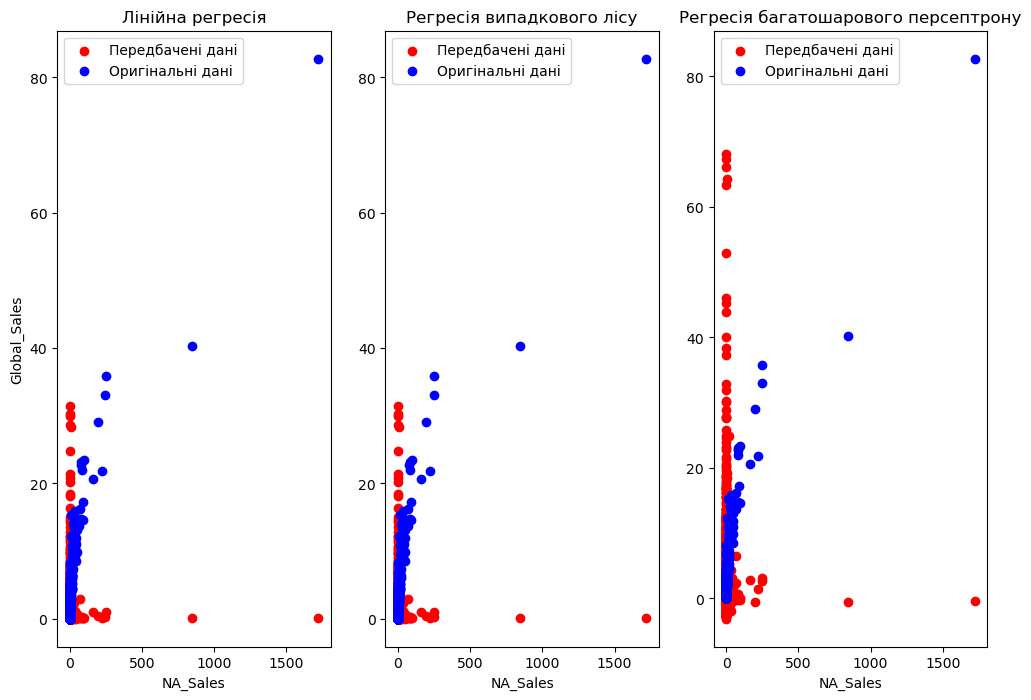

In [32]:
x_test_2 = x_test**2

# Оцінка моделей за середньою квадратичною помилкою
mse_linear = mean_squared_error(x_test_2, linear_reg.predict(x_test_2))
mse_rgr = mean_squared_error(x_test_2, rgr_reg.predict(x_test_2))
mse_mlpp = mean_squared_error(x_test_2, mlpp_reg.predict(x_test_2))

print(f'MSE Лінійна регресія: {mse_linear}')
print(f'MSE Регресія випадкового лісу: {mse_rgr}')
print(f'MSE Регресія багатошарового персептрону: {mse_mlpp}')

# Візуалізація результатів
plt.figure(figsize=(12, 8))

# Лінійна регресія
plt.subplot(1, 3, 1)
plt.scatter(x_test_2, linear_reg.predict(x_test_2), color='red')
plt.scatter(x_test_2, y_test, color='blue')
plt.title('Лінійна регресія')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

# Регресія випадкового лісу
plt.subplot(1, 3, 2)
plt.scatter(x_test_2, rgr_reg.predict(x_test_2), color='red')
plt.scatter(x_test_2, y_test, color='blue')
plt.title('Регресія випадкового лісу')
plt.xlabel('NA_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

# Регресія багатошарового персептрону
plt.subplot(1, 3, 3)
plt.scatter(x_test_2, mlpp_reg.predict(x_test_2), color='red')
plt.scatter(x_test_2, y_test, color='blue')
plt.title('Регресія багатошарового персептрону')
plt.xlabel('NA_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

plt.show()

6. Протестувати набір регресійних моделей з двома предикторами. Побудувати точності та  графіки для обох ознак. Порівняти на графіках результати прогнозування з однією та двома  ознаками взявши за x початкову ознаку. Для цього використайте matplotlib та seaborn. 

MSE Лінійна регресія: 0.0
MSE Регресія випадкового лісу: 0.0
MSE Регресія багатошарового персептрону: 1.2849482233774059


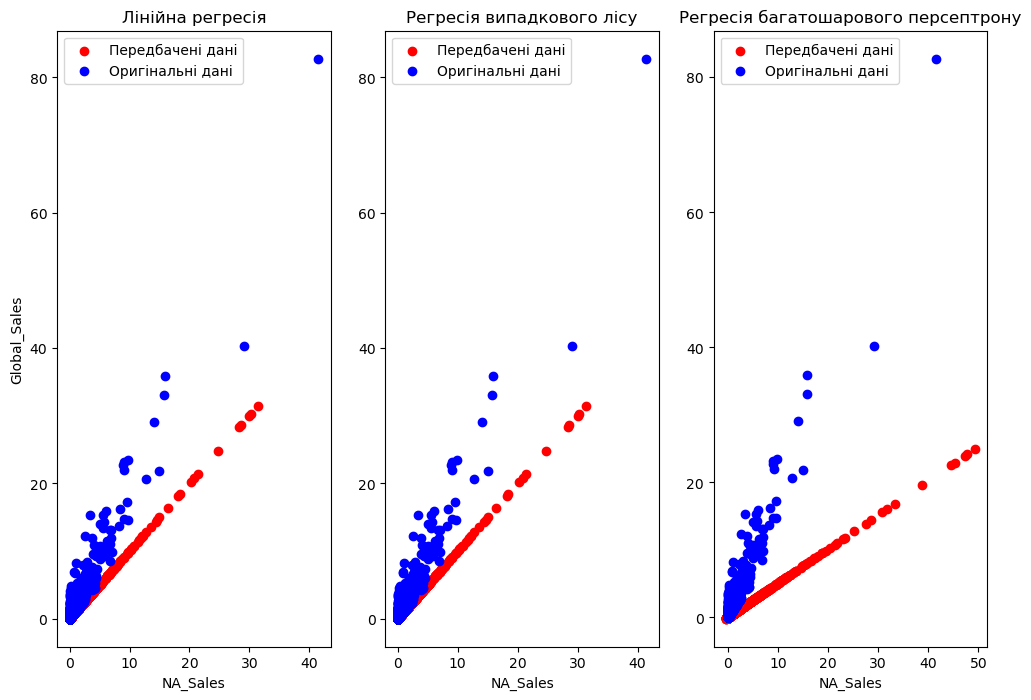

In [33]:
# Оцінка моделей за середньою квадратичною помилкою
mse_linear = mean_squared_error(linear_reg.predict(y_test), linear_reg.predict(x_test))
mse_rgr = mean_squared_error(rgr_reg.predict(y_test), rgr_reg.predict(x_test))
mse_mlpp = mean_squared_error(mlpp_reg.predict(y_test), mlpp_reg.predict(x_test))

print(f'MSE Лінійна регресія: {mse_linear}')
print(f'MSE Регресія випадкового лісу: {mse_rgr}')
print(f'MSE Регресія багатошарового персептрону: {mse_mlpp}')

# Візуалізація результатів
plt.figure(figsize=(12, 8))

# Лінійна регресія
plt.subplot(1, 3, 1)
plt.scatter(linear_reg.predict(y_test), linear_reg.predict(x_test), color='red')
plt.scatter(x_test, y_test, color='blue')
plt.title('Лінійна регресія')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

# Регресія випадкового лісу
plt.subplot(1, 3, 2)
plt.scatter(rgr_reg.predict(y_test), rgr_reg.predict(x_test), color='red')
plt.scatter(x_test, y_test, color='blue')
plt.title('Регресія випадкового лісу')
plt.xlabel('NA_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

# Регресія багатошарового персептрону
plt.subplot(1, 3, 3)
plt.scatter(mlpp_reg.predict(y_test), mlpp_reg.predict(x_test), color='red')
plt.scatter(x_test, y_test, color='blue')
plt.title('Регресія багатошарового персептрону')
plt.xlabel('NA_Sales')
plt.legend(['Передбачені дані', 'Оригінальні дані'])

plt.show()

7. Додатково. Приклади коду. Візуалізувати результат регресії з двома предикторами за  допомогою mplot3d для кожної з регресійних моделей.

***
Джерела:
- https://www.markdownguide.org/basic-syntax/
- https://logowik.com/conda-logo-vector-svg-png-free-download-25381.html
- https://www.anaconda.com/blog/2021-year-in-review
- https://docs.anaconda.com/free/navigator/index.html
- https://www.spyder-ide.org/
- https://jupyter.org/
- https://www.anaconda.com/
- https://www.kaggle.com/datasets/gregorut/videogamesales
- https://ipython.org/notebook.html
- https://dev.to/fharookshaik/install-both-anaconda-and-python-windows-2aje
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://pandas.pydata.org/docs/index.html
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
- https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
- https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html